# Links


1. Analytics Vidya Link:

https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/





# Imports

In [1]:
# !pip install xgboost==1.1.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import xgboost
from math import sqrt

# Preparing Data

In [3]:
data_set = "/home/tbrk/OneDrive/Documents/Learning/ML Datasets/bigmart_sales/Big_mart_train.csv"
test_data = "/home/tbrk/OneDrive/Documents/Learning/ML Datasets/bigmart_sales/Big_mart_test.csv"

data = pd.read_csv(data_set)   # change header parameter based on input data file
test_data_set = pd.read_csv(test_data)

res_df = test_data_set[['Item_Identifier','Outlet_Identifier']]

In [4]:
test_data_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
#manually enter continous columns, categorical columns and target variable in data
continous_variable = ["Item_Weight","Item_Visibility","Item_MRP"]
target_variable = "Item_Outlet_Sales"
unwanted = []
categorical_variable = list(set(data.columns)-set(continous_variable+[target_variable]+unwanted))

In [10]:
#missing values and dups check
print("Missing values check:")
print("In Train\n",data.isnull().sum(),'\n')
print("In Test\n",test_data_set.isnull().sum(),'\n')

print("Duplicate values check in Train:")
if len(data[data.duplicated()]) > 0:
    print("Number of duplicated entries {}".format(len(data[data.duplicated()])))
    print(data[data.duplicated()])
else:
    print("No duplicated entries found")

Missing values check:
In Train
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

In Test
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64 

Duplicate values check in Train:
No duplicated entries found


Missing Count 2410 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Missing Count 0 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Missing Count 0 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 

Missing Count 0 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Missing Count 0 

FDW13    10
FDG33    10
NCB18     9
FDV38     9
FDX20     9
         ..
FDC23     1
FDO33 

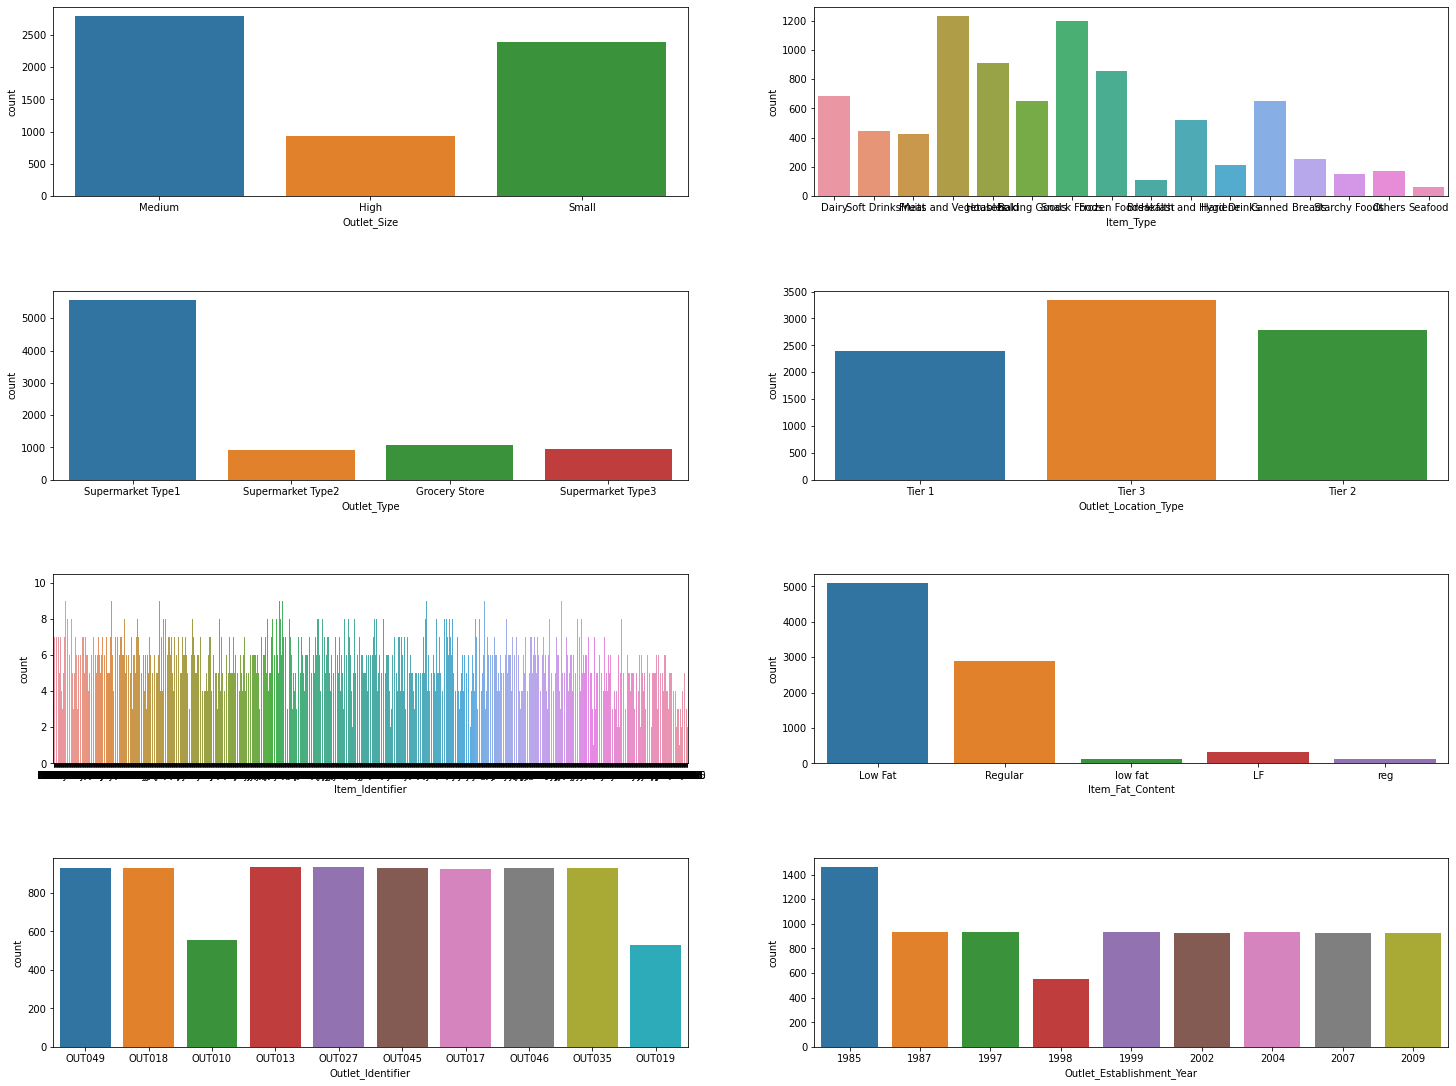

In [11]:
#value_counts in each categorical column
subplots_count = len(categorical_variable)
fig = plt.figure(figsize=(25,40))
fig.subplots_adjust(hspace=0.5)
for v,col in enumerate(categorical_variable):
    print("Missing Count",data[col].isnull().sum(),'\n')
    print(data[col].value_counts(),'\n')
    v+=1
    axs = fig.add_subplot(subplots_count,2,v)
    sns.countplot(x=col,data=data)
plt.show()

In [12]:
for v,col in enumerate(categorical_variable):
    print("Missing Count",test_data_set[col].isnull().sum(),'\n')
    print(test_data_set[col].value_counts(),'\n')
plt.show()

Missing Count 1606 

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64 

Missing Count 0 

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64 

Missing Count 0 

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64 

Missing Count 0 

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64 

Missing Count 0 

NCS41    8
DRF48    8
FDK57    8
FDP15    8
FDZ50    8
        ..
FDT55    1
DRD13    1
FDX45    1
FDT40  

## Manual Work Here

In [13]:
data['Item_Category'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({"Low Fat":"Low Fat","Regular":"Regular","LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
print("\n",data['Item_Fat_Content'].value_counts())

weight_mean_df = data.groupby('Item_Type',as_index=False)['Item_Weight'].mean()
print("\n",weight_mean_df)
weight_mean_dict = dict(zip(weight_mean_df['Item_Type'],weight_mean_df['Item_Weight']))
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Type'].map(weight_mean_dict))

data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')

data.head()


 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

                 Item_Type  Item_Weight
0            Baking Goods    12.277108
1                  Breads    11.346936
2               Breakfast    12.768202
3                  Canned    12.305705
4                   Dairy    13.426069
5            Frozen Foods    12.867061
6   Fruits and Vegetables    13.224769
7             Hard Drinks    11.400328
8      Health and Hygiene    13.142314
9               Household    13.384736
10                   Meat    12.817344
11                 Others    13.853285
12                Seafood    12.552843
13            Snack Foods    12.987880
14            Soft Drinks    11.847460
15          Starchy Foods    13.690731


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [14]:
test_data_set['Item_Category'] = test_data_set['Item_Identifier'].apply(lambda x: x[:2])
test_data_set['Item_Fat_Content'] = test_data_set['Item_Fat_Content'].map({"Low Fat":"Low Fat","Regular":"Regular","LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
print("\n",test_data_set['Item_Fat_Content'].value_counts())

weight_mean_df_test = test_data_set.groupby('Item_Type',as_index=False)['Item_Weight'].mean()
print("\n",weight_mean_df_test)
weight_mean_dict_test = dict(zip(weight_mean_df_test['Item_Type'],weight_mean_df_test['Item_Weight']))
test_data_set['Item_Weight'] = test_data_set['Item_Weight'].fillna(test_data_set['Item_Type'].map(weight_mean_dict_test))

categorical_variable.append('Item_Category')
categorical_variable.remove('Item_Type')
categorical_variable.remove('Item_Identifier')
test_data_set['Outlet_Size'] = test_data_set['Outlet_Size'].fillna('Medium')

test_data_set.head()


 Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

                 Item_Type  Item_Weight
0            Baking Goods    12.272418
1                  Breads    10.866799
2               Breakfast    13.759603
3                  Canned    12.393565
4                   Dairy    12.955040
5            Frozen Foods    12.101543
6   Fruits and Vegetables    13.146659
7             Hard Drinks    11.844417
8      Health and Hygiene    13.216929
9               Household    13.270504
10                   Meat    12.702148
11                 Others    14.009725
12                Seafood    13.241136
13            Snack Foods    12.684256
14            Soft Drinks    11.691965
15          Starchy Foods    13.618247


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,FDW58,20.75000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD
1,FDW14,8.30000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD
2,NCN55,14.60000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NC
3,FDQ58,7.31500,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD
4,FDY38,12.95504,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD


In [15]:
print("Missing values check:")
print("In Train\n",data.isnull().sum(),'\n')
print("In Test\n",test_data_set.isnull().sum(),'\n')

print("Duplicate values check in Train:")
if len(data[data.duplicated()]) > 0:
    print("Number of duplicated entries {}".format(len(data[data.duplicated()])))
    print(data[data.duplicated()])
else:
    print("No duplicated entries found")

Missing values check:
In Train
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Category                0
dtype: int64 

In Test
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Category                0
dtype: int64 

Duplicate values check in Train:
No duplicated entries found


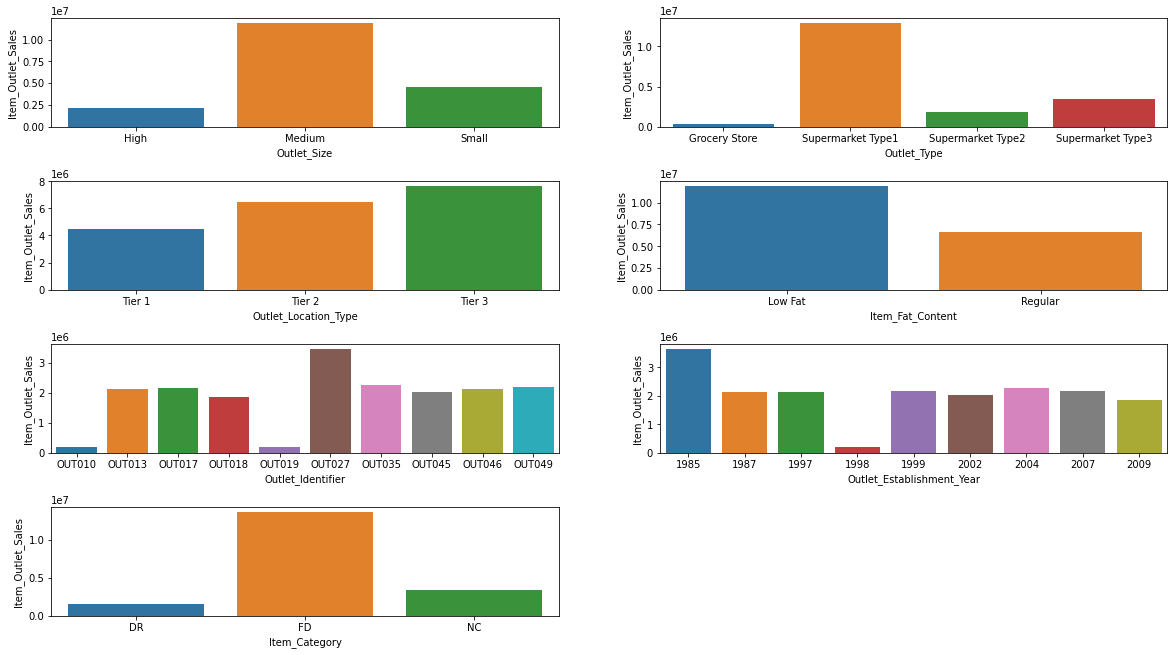

In [16]:
subplots_count = len(categorical_variable)

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5)
for v,col in enumerate(categorical_variable):
    v+=1
    axs = fig.add_subplot(subplots_count,2,v)
    df = data.groupby(col,as_index=False)['Item_Outlet_Sales'].sum()
    sns.barplot(x=df[col],y=df['Item_Outlet_Sales'])
plt.show()

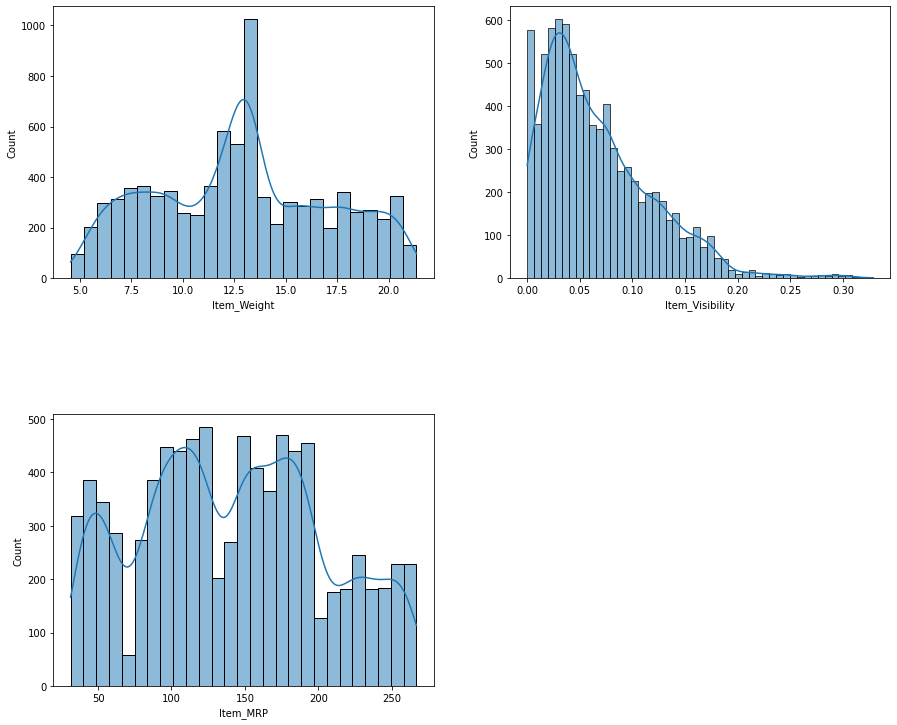

In [17]:
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.5)
subplots_count = len(continous_variable)
for v,col in enumerate(continous_variable):
    v+=1
    axs = fig.add_subplot(subplots_count,2,v)
    sns.histplot(data[continous_variable][col],ax=axs, kde=True)
plt.show()

In [18]:
def categorize_visibility(x):
    if 0<x<=0.027:
        return "Very Low"
    elif 0.027<x<=0.054:
        return "Low"
    elif 0.054<x<=0.095:
        return "Medium"
    else:
        return "High"

data['Item_Visibility'] = data['Item_Visibility'].apply(lambda x: categorize_visibility(x))
test_data_set['Item_Visibility'] = test_data_set['Item_Visibility'].apply(lambda x: categorize_visibility(x))

categorical_variable.append('Item_Visibility')
continous_variable.remove('Item_Visibility')

In [19]:
print(data['Item_Visibility'].value_counts())

High        2645
Medium      2137
Low         2135
Very Low    1606
Name: Item_Visibility, dtype: int64


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   object 
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Category              8523 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage:

In [21]:
test_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   object 
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Item_Category              5681 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 532.7+ KB


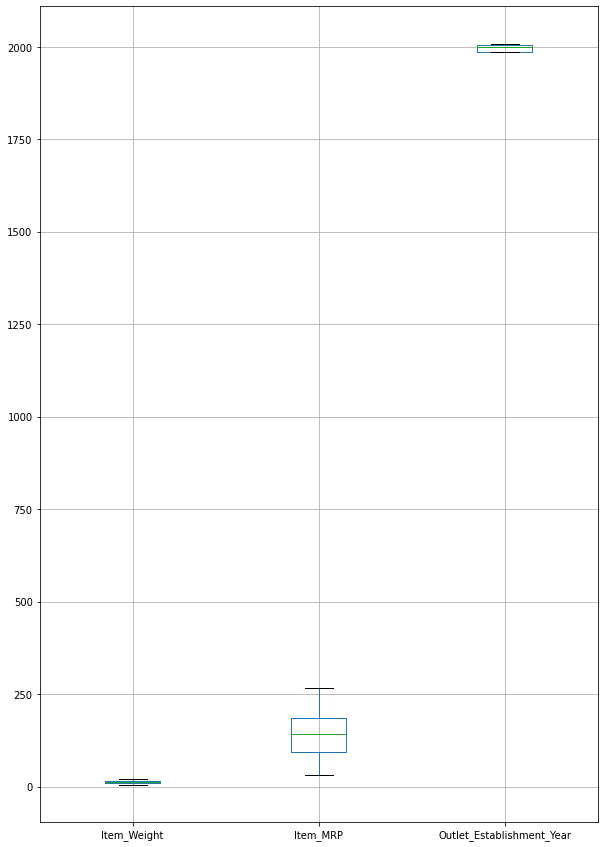

In [22]:
#outliers
data.drop('Item_Outlet_Sales',1).boxplot(figsize=(10,15))
plt.show()

In [23]:
if unwanted:
    data=data.drop(unwanted,axis=1)
    test_data_set = test_data_set.drop(unwanted,axis=1)
    
data = data.drop(['Item_Identifier','Item_Type'],1)
test_data_set = test_data_set.drop(['Item_Identifier','Item_Type'],1)

In [24]:
data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30000,Low Fat,Very Low,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.92000,Regular,Very Low,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.50000,Low Fat,Very Low,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,19.20000,Regular,High,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,8.93000,Low Fat,High,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
5,10.39500,Regular,High,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD
6,13.65000,Regular,Very Low,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD
7,12.98788,Low Fat,High,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD
8,16.20000,Regular,Very Low,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,FD
9,19.20000,Regular,Medium,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,FD


In [25]:
test_data_set.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,20.750000,Low Fat,Very Low,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD
1,8.300000,Regular,Low,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD
2,14.600000,Low Fat,High,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NC
3,7.315000,Low Fat,Very Low,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD
4,12.955040,Regular,High,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD
5,9.800000,Regular,Medium,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,FD
6,19.350000,Regular,Medium,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,FD
7,12.272418,Low Fat,Very Low,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD
8,6.305000,Regular,High,95.7436,OUT045,2002,Medium,Tier 2,Supermarket Type1,FD
9,5.985000,Low Fat,Very Low,186.8924,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD


## Encoding Columns

In [57]:
train_data_dummies=pd.get_dummies(data = data, columns=categorical_variable, prefix=categorical_variable,prefix_sep= "_")

test_data_dummies=pd.get_dummies(data = test_data_set, columns=categorical_variable, prefix=categorical_variable,prefix_sep= "_")

In [55]:
train_data_dummies.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_Visibility_High,Item_Visibility_Low,Item_Visibility_Medium,Item_Visibility_Very Low
0,9.30,249.8092,3735.1380,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5.92,48.2692,443.4228,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
2,17.50,141.6180,2097.2700,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,19.20,182.0950,732.3800,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,53.8614,994.7052,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [58]:
test_data_dummies.head()

,Item_Weight,Item_MRP,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_Visibility_High,Item_Visibility_Low,Item_Visibility_Medium,Item_Visibility_Very Low
0,20.75000,107.8622,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,8.30000,87.3198,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.60000,241.7538,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,7.31500,155.0340,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,12.95504,234.2300,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [59]:
test_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Item_Weight                     5681 non-null   float64
 1   Item_MRP                        5681 non-null   float64
 2   Outlet_Size_High                5681 non-null   uint8  
 3   Outlet_Size_Medium              5681 non-null   uint8  
 4   Outlet_Size_Small               5681 non-null   uint8  
 5   Outlet_Type_Grocery Store       5681 non-null   uint8  
 6   Outlet_Type_Supermarket Type1   5681 non-null   uint8  
 7   Outlet_Type_Supermarket Type2   5681 non-null   uint8  
 8   Outlet_Type_Supermarket Type3   5681 non-null   uint8  
 9   Outlet_Location_Type_Tier 1     5681 non-null   uint8  
 10  Outlet_Location_Type_Tier 2     5681 non-null   uint8  
 11  Outlet_Location_Type_Tier 3     5681 non-null   uint8  
 12  Item_Fat_Content_Low Fat        56

In [ ]:
# data_corr = data.corr()
# fig = plt.figure(figsize=(25,25))
# sns.heatmap(data_corr,annot=True)

# Training and Predicting

## Cross Validating and Training Model

In [60]:
y_train = train_data_dummies[target_variable]

In [61]:
x_train = train_data_dummies.drop(target_variable,axis=1)

In [62]:
x_train.head()

,Item_Weight,Item_MRP,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_Visibility_High,Item_Visibility_Low,Item_Visibility_Medium,Item_Visibility_Very Low
0,9.30,249.8092,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,5.92,48.2692,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
2,17.50,141.6180,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,19.20,182.0950,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,53.8614,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [63]:
# METRICS:
'''
['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'top_k_accuracy',
 'v_measure_score']
'''
# lr_model = LogisticRegression(max_iter=200)
# rf_model = RandomForestClassifier(n_estimators=200,max_features='log2',max_depth=4,criterion='entropy',min_samples_split=5,random_state=8)
# dt_model = DecisionTreeClassifier()
# svc_model = SVC()
# knn_model = KNeighborsClassifier()
# nb_model = GaussianNB()

svr_model = SVR(kernel='linear',C=30)
ln_model = LinearRegression()
xgb_reg_model = xgboost.XGBRegressor(objective='reg:squarederror',colsample_bytree= 0.9,
                                     learning_rate=0.02,max_depth= 3,min_child_weight= 100,
                                     n_estimators= 300,subsample= 0.5)





# parameters = {'learning_rate': [0.02,0.04,0.1,0.2,0.4],
#               'max_depth': [3,4,5,6,8,10],
#               'min_child_weight': [11],
#               'subsample': [0.8],
#               'colsample_bytree': [0.7],
#               'n_estimators': [5,50,100,200,300,500,1000]}


# clf = GridSearchCV(xgb_reg_model, parameters, n_jobs=-1, 
#                    cv=KFold(n_splits=10,shuffle=True,random_state=8), 
#                    scoring='neg_mean_squared_error',
#                    verbose=2, refit=True)

models = [svr_model,ln_model,xgb_reg_model]
for model in models:
    kfold=KFold(n_splits=10,shuffle=True,random_state=8) 
    cross_val_sc=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=kfold)
    print('{} : rmse: {}'.format(str(model)[0],sqrt(abs(cross_val_sc.mean()))))


S : rmse: 1143.8307189025231
L : rmse: 1129.7540345065977
X : rmse: 1076.5848371397672


In [64]:
for model in models:
    model.fit(x_train,y_train)

# clf.fit(x_train,y_train)
# print(clf.best_params_)
# print(sqrt(abs(clf.best_score_)))

## Predicting

In [65]:
test_data_dummies.head()

,Item_Weight,Item_MRP,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_Visibility_High,Item_Visibility_Low,Item_Visibility_Medium,Item_Visibility_Very Low
0,20.75000,107.8622,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,8.30000,87.3198,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.60000,241.7538,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,7.31500,155.0340,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,12.95504,234.2300,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [66]:

(x_train.columns != test_data_dummies.columns).sum()

0

In [68]:
preds = {}
for model in models:
    test_pred = model.predict(test_data_dummies)
    preds[str(model)[0]]=test_pred

In [69]:
for key,arr in preds.items():
    arr[arr<0] = 0

In [72]:
res_df['Item_Outlet_Sales'] = preds['X']

In [73]:
res_df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1550.552002
1,FDW14,OUT017,1392.471558
2,NCN55,OUT010,795.503845
3,FDQ58,OUT017,2505.399170
4,FDY38,OUT027,5836.778809
...,...,...,...
5676,FDB58,OUT046,2157.820312
5677,FDD47,OUT018,2475.864258
5678,NCO17,OUT045,1860.631958
5679,FDJ26,OUT017,3537.356201


In [74]:
res_df.to_csv('pred_values.csv',index=False)  #exporting model results
